In [1]:
# std
import os
import sys
import re

# 3rd party
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


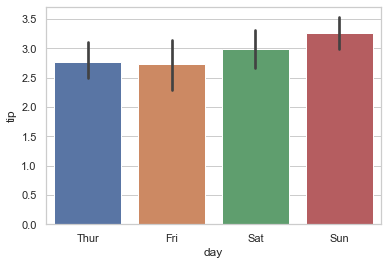

In [4]:
ax = sns.barplot(x="day", y="tip", data=tips)

In [5]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


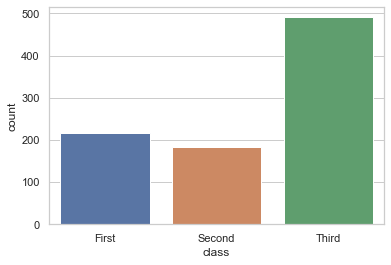

In [6]:
ax = sns.countplot(x="class", data=titanic)

In [34]:
# get connected to the database
connection = pg.connect(user='scientist',
                        password='Xh05@80yX',
                        host='127.0.01',
                        port='5432',
                        database='wn18')

In [44]:
df_entity = psql.read_sql("SELECT * FROM entity", connection)
df_entity.head()

,synset_id,doc,pos_tag,sense_index,definition
0,14854262,stool,NN,2,solid excretory product evacuated from the bowels
1,00590383,chieftainship,NN,1,the position of chieftain
2,08769179,saxony,NN,1,an area in Germany around the upper Elbe river...
3,02338145,ondatra zibethica,NN,1,beaver-like aquatic rodent of North America wi...
4,01990168,founder,VB,2,sink below the surface


In [45]:
df_entity.count()

synset_id      40943
doc            40943
pos_tag        40943
sense_index    40943
definition     40943
dtype: int64

In [47]:
df_entity_counts = df_entity.count().to_frame()
df_entity_counts.head()

,0
synset_id,40943
doc,40943
pos_tag,40943
sense_index,40943
definition,40943


In [48]:
df_entity_counts = df_entity_counts.reset_index().rename(columns={'index': 'lab', 0: 'value'})
df_entity_counts.head()

,lab,value
0,synset_id,40943
1,doc,40943
2,pos_tag,40943
3,sense_index,40943
4,definition,40943


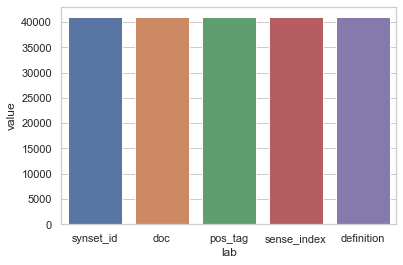

In [49]:
ax = sns.barplot(x="lab", y="value", data=df_entity_counts)

In [55]:
df_relation = psql.read_sql("SELECT * FROM relation", connection)
df_relation.head()

,id,doc
0,1,also see
1,2,synset domain usage of
2,3,derivationally related form
3,4,hypernym
4,5,member meronym


In [56]:
df_relation_counts = df_relation.count().to_frame()
df_relation_counts.head()

,0
id,18
doc,18


In [57]:
df_relation_counts = df_relation_counts.reset_index().rename(columns={'index': 'lab', 0: 'value'})
df_relation_counts.head()

,lab,value
0,id,18
1,doc,18


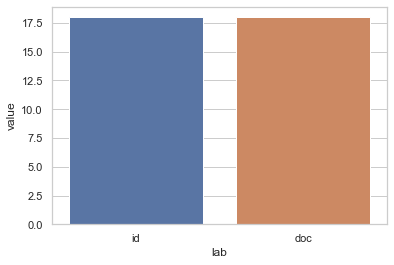

In [58]:
ax = sns.barplot(x="lab", y="value", data=df_relation_counts)

In [65]:
df_triple = psql.read_sql("SELECT * FROM train UNION SELECT * FROM valid UNION SELECT * FROM test", connection)
df_triple.head()

,id,subject,predicate,object
0,1,02174461,hypernym,02176268
1,1,03964744,hyponym,04371774
2,1,06845599,member of domain usage,03754979
3,2,00260881,hypernym,00260622
4,2,00789448,verb group,01062739


In [66]:
df_triple_counts = df_triple.count().to_frame()
df_triple_counts.head()

,0
id,151442
subject,151442
predicate,151442
object,151442


In [67]:
df_triple_counts = df_triple_counts.reset_index().rename(columns={'index': 'lab', 0: 'value'})
df_triple_counts.head()

,lab,value
0,id,151442
1,subject,151442
2,predicate,151442
3,object,151442


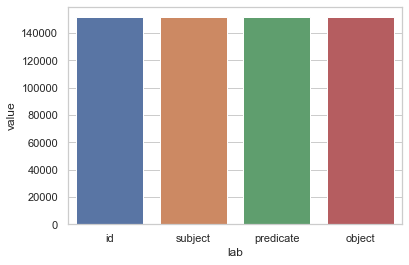

In [68]:
ax = sns.barplot(x="lab", y="value", data=df_triple_counts)

In [75]:
df_triple_counts.loc[0, 'value']

151442

In [90]:
df_triple_entity_relation_counts = pd.DataFrame([df_triple_counts.loc[0, 'value'], df_entity_counts.loc[0, 'value'], df_relation_counts.loc[0, 'value']], 
                                                index=['triple', 'entity', 'relation'])
df_triple_entity_relation_counts.head()

,0
triple,151442
entity,40943
relation,18


In [91]:
df_triple_entity_relation_counts = df_triple_entity_relation_counts.reset_index().rename(columns={'index': 'lab', 0: 'value'})
df_triple_entity_relation_counts.head()

,lab,value
0,triple,151442
1,entity,40943
2,relation,18


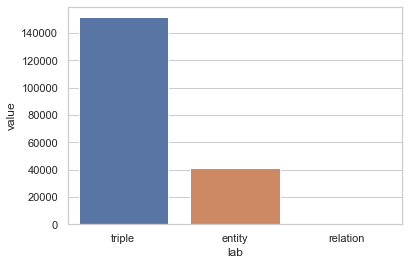

In [92]:
ax = sns.barplot(x="lab", y="value", data=df_triple_entity_relation_counts)